# Hyperparameter Tuning with GridSearch

While most/all machine learning models are simple to execute by simple providing it with your data, most models can be further optimized by tuning the hyperparameters. **Hyperparameters are all of the parameters of the model that influence how it learns from your data.** In KNN, it could be the number of neighbors. In regression, it could be the regularization alpha value. In SVM, it could be the penalty term.

Sadly, there isn't always an easy answer to how we tune these hyperparameters. However, this doesn't mean that we can't brute force our way to an optimal setup! Gridsearch is a module that allows us to test our model with numerous hyperparameter values and then provides us with the optimal configuration.

### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

### Generate data 

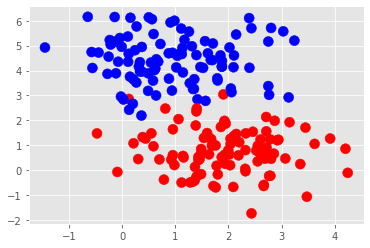

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

### Split data into training and testing

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Create the SVC Model

In [4]:
from sklearn.svm import SVC 
model = SVC(kernel="linear")
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Create the GridSearch estimator along with a parameter object containing the values to adjust

GridSearch requires 2 things:
1. A model
2. A dictionary of the hyperparameters and the associated lists of values to test with.

In the example below, we're tuning 2 hyperparameters of an SVC model:
1. **C** is the penalty term for SVMs. A higher value means the model will be more strict about preventing points from crossing the boundary. A lower value will *soften* the margins and allow for some leniency with points crossing over.
2. **gamma** defines how far the influence of single training example reaches. A high gamma means our decision boundary is more influenced by closeby points. A low gamma increases the influence of points further away from the decision boundary.

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.05, 0.5]}

grid = GridSearchCV(model, param_grid, verbose=3)

### Fit the model using the grid search estimator. 

This will take the SVC model and try each combination of parameters

In [6]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.867, total=   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.733, total=   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.767, total=   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.767, total=   0.0s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ............... C=0.001, gamma=0.0001, score=0.667, total=   0.0s
[CV] C=0.001, gamma=0.0005 ...........................................
[CV] ............... C=0.001, gamma=0.0005, score=0.867, total=   0.0s
[CV] C=0.001, gamma=0.0005 ...........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=5, gamma=0.5, score=0.967, total=   0.0s
[CV] C=5, gamma=0.5 ..................................................
[CV] ...................... C=5, gamma=0.5, score=1.000, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.967, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.967, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.933, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.967, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=10, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.05, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

### List the best parameters for this dataset

In [7]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


### List the best score

In [8]:
print(grid.best_score_)

0.9866666666666667


### Make predictions with the hypertuned model

In [9]:
predictions = grid.predict(X_test)

### Calculate classification report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.91      1.00      0.95        21
         red       1.00      0.93      0.96        29

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50

